## 词云图

- [word_cloud](https://github.com/amueller/word_cloud)库

In [16]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset
# 新增
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude

## 简单例子

- 问题： 只能以image的形式渲染，保存的图片格式不是矢量图

- 解决方案： 如下

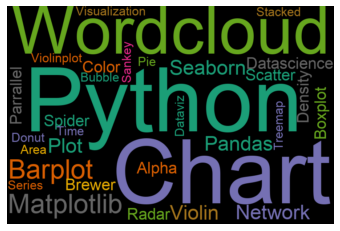

In [2]:

# Create a list of word
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")

# Create the wordcloud object
figwidth,figheight=900,600
wc = WordCloud(width=figwidth, height=figheight, margin=0,colormap='Dark2',font_path='Arial').generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

fname_fig='../../figures/Chapter3/Lecture3_8_basic1.pdf'
plt.savefig(fname_fig)
os.system('pdfcrop '+fname_fig+' '+fname_fig)

plt.show()


## 以矢量图形式渲染

- 难点：分辨率-图片大小-字体大小之间的关系

In [3]:
def plotWordCloud(wc,dpi=100,ratio=1.39,bkcolor='w'):
    array_wc=wc.to_array()
    figwidth,figheight=array_wc.shape[1],array_wc.shape[0]
    # 3. 绘制词云图
    ratio_fontsize=ratio/(dpi/100)
    fig=plt.figure(figsize=(figwidth/dpi,figheight/dpi),dpi=dpi,facecolor=bkcolor) #******划重点
    ax=plt.gca()
    ax.axis('scaled')
    ax.set_xlim(0,figwidth)
    ax.set_ylim(0,figheight)
    ax.invert_yaxis()
    plt.subplots_adjust(left=0,right=1,top=1,bottom=0)
    # 4. 根据词云图数据中的文字坐标、字体大小、颜色和旋转角度绘制文字
    for layout in wc.layout_:
        text0=layout[0][0]
        x,y=layout[2]
        fontsize=layout[1]
        angle=layout[3]
        if(angle==None):
            angle=0
        else:
            angle=90
        color=np.array(layout[4].split('(')[-1].split(')')[0].split(','),dtype=int)/255
        ax.text(y,x,text0,fontsize=fontsize/ratio_fontsize,rotation=angle,va='top',ha='left',color=color)

    ax.set_facecolor('w')
    return ax

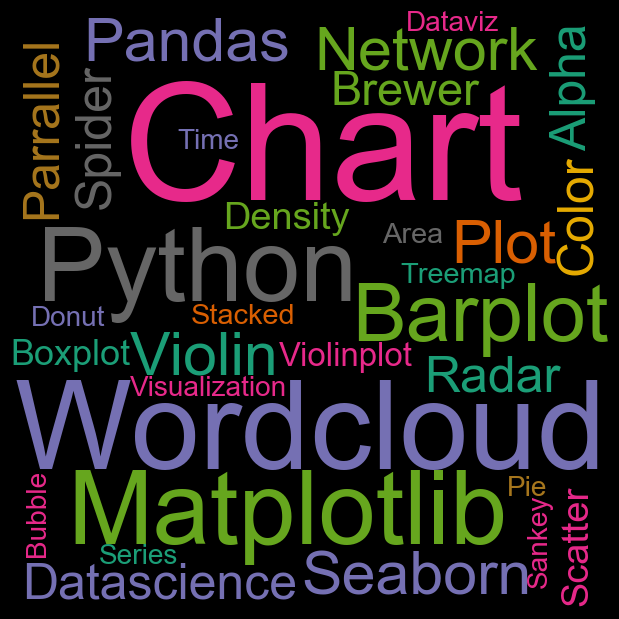

In [4]:
# 1. 字体
fontpath='Arial'
fontprop=mpl.font_manager.FontProperties(fname=fontpath)
# 2. 生成词云图数据
text=("Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
figwidth,figheight=600,600
wc = WordCloud(width=figwidth, height=figheight, margin=0,colormap='Dark2',font_path=fontpath).generate(text)
# 3. 绘制词云图
ax=plotWordCloud(wc,bkcolor='k')
ax.axis('off')

fname_fig='../../figures/Chapter3/Lecture3_8_basic1.pdf'
plt.savefig(fname_fig)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()

wc.to_file('../../figures/Chapter3/Lecture3_8_basic1.png')

## 更多样式

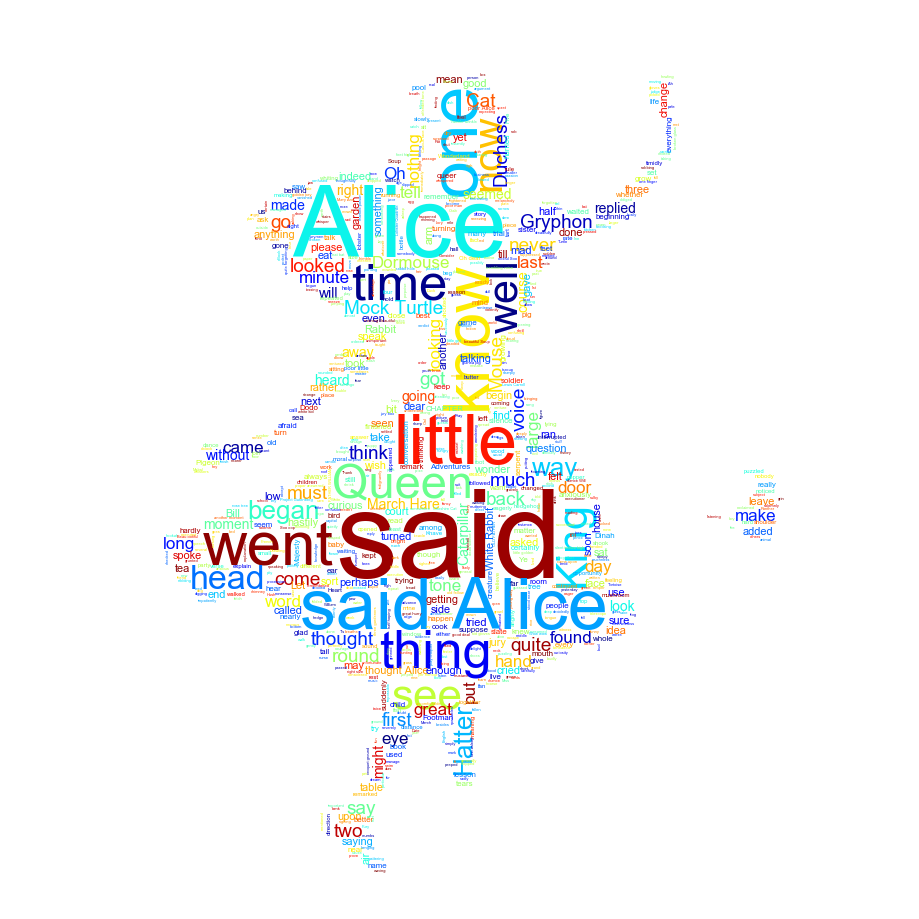

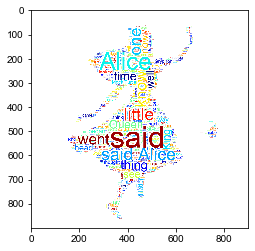

In [75]:
text = open(os.path.join(d, 'Data/wordcloud/alice.txt')).read()
alice_mask = np.array(Image.open("Data/wordcloud/alice_mask.png"))
# 1. 字体
fontpath='Arial'
fontprop=mpl.font_manager.FontProperties(fname=fontpath)
# 2. 生成词云图数据
figwidth,figheight=wc.to_array().shape[0],wc.to_array().shape[1]
wc = WordCloud(margin=0,background_color="white", max_words=2000, mask=alice_mask,colormap='jet',
               font_path=fontpath).generate(text)

# 3. 绘制词云图
ax=plotWordCloud(wc)
ax.axis('off')
fname_fig='../../figures/Chapter3/Lecture3_8_example1.pdf'
plt.savefig(fname_fig)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()

plt.figure()
plt.imshow(wc)
# plt.axis("off")

plt.savefig('../../figures/Chapter3/Lecture3_8_test.png',dpi=900)

## 更多样式2

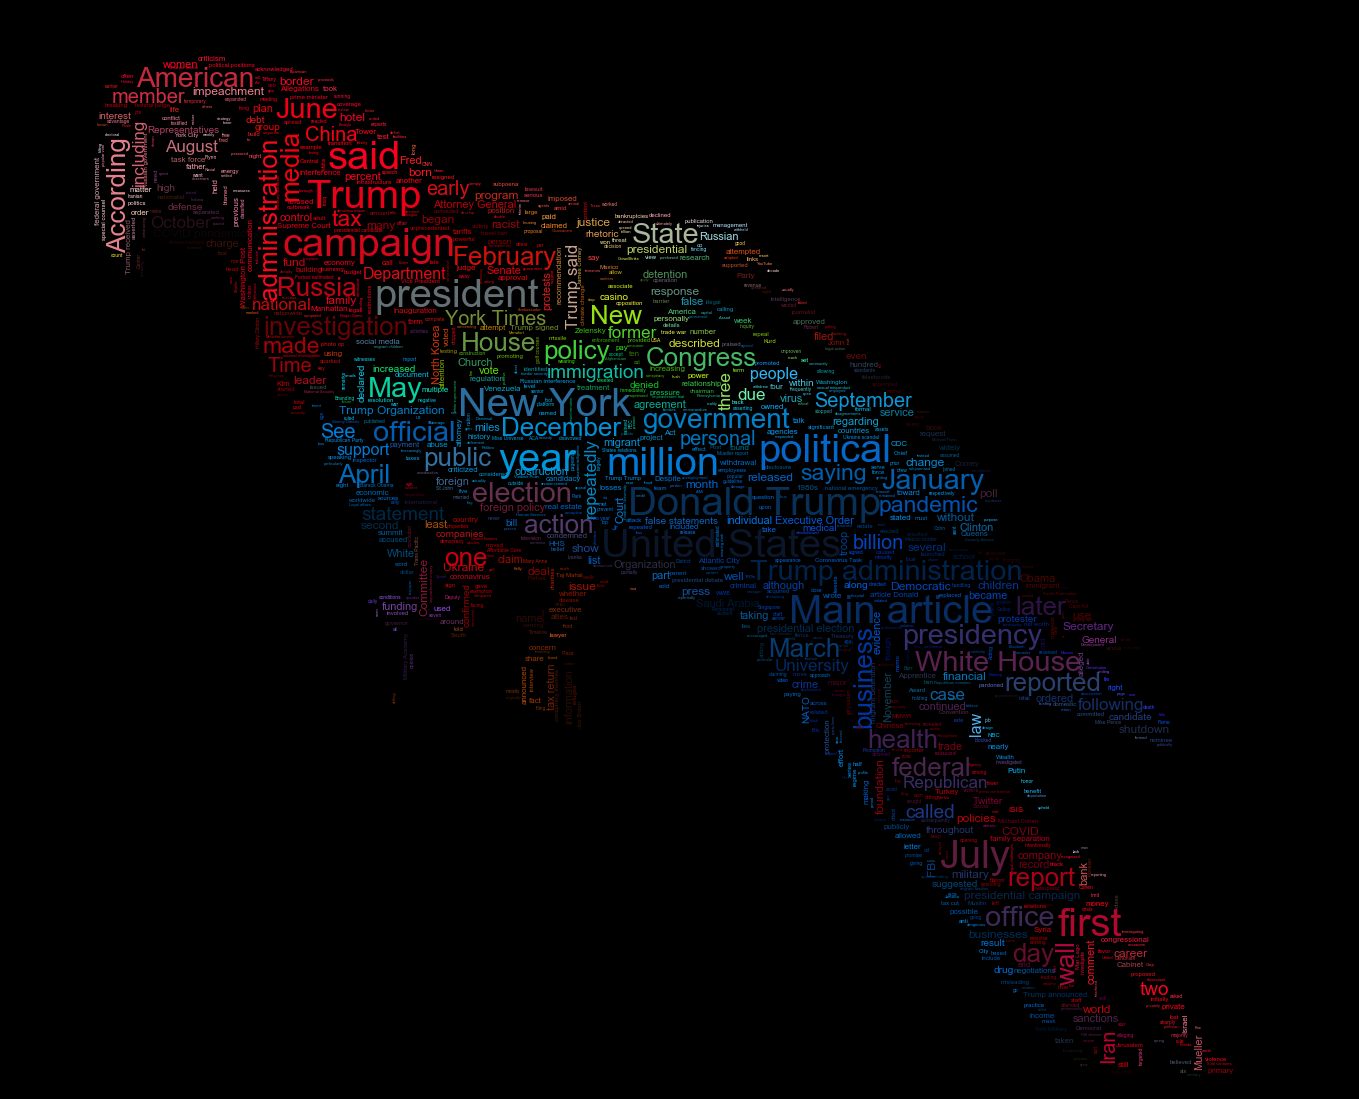

In [65]:
# 读取文本
text = open('Data/wordcloud/Trump.txt', encoding="utf-8").read()
# 打开mask图像
parrot_color = np.array(Image.open("Data/wordcloud/parrot-by-jose-mari-gimenez2.jpg"))
# 重采样
parrot_color = parrot_color[::3, ::3]
# 白色部分是要mask的部分
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255
# 提取图片边界
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255
# 创建词云图对象
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0,font_path=fontpath)
# 生成词云图数据
wc.generate(text)
# 读取图片，提取颜色并给词云图文本重新着色
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)

# 3. 绘制词云图矢量图
ax=plotWordCloud(wc,bkcolor='k')
ax.axis('off')
fname_fig='../../figures/Chapter3/Lecture3_8_example2.pdf'
plt.savefig(fname_fig,facecolor='k')
plt.show()

wc.to_file(fname_fig.replace('.pdf','.png'))


## 练习

- 目标：处理前三章所有课程的绘图代码后作为输入文本，用词云图统计显示常用的函数和参数

- mask图像：[Matplotlib logo](Data/wordcloud/Matplotlib.pdf)

- 词云图颜色：[Matplotlib logo](Data/wordcloud/Matplotlib.pdf)

- 前三章所有绘图代码：[code_chapter1_3.txt](Data/wordcloud/code_chapter1_3.txt)

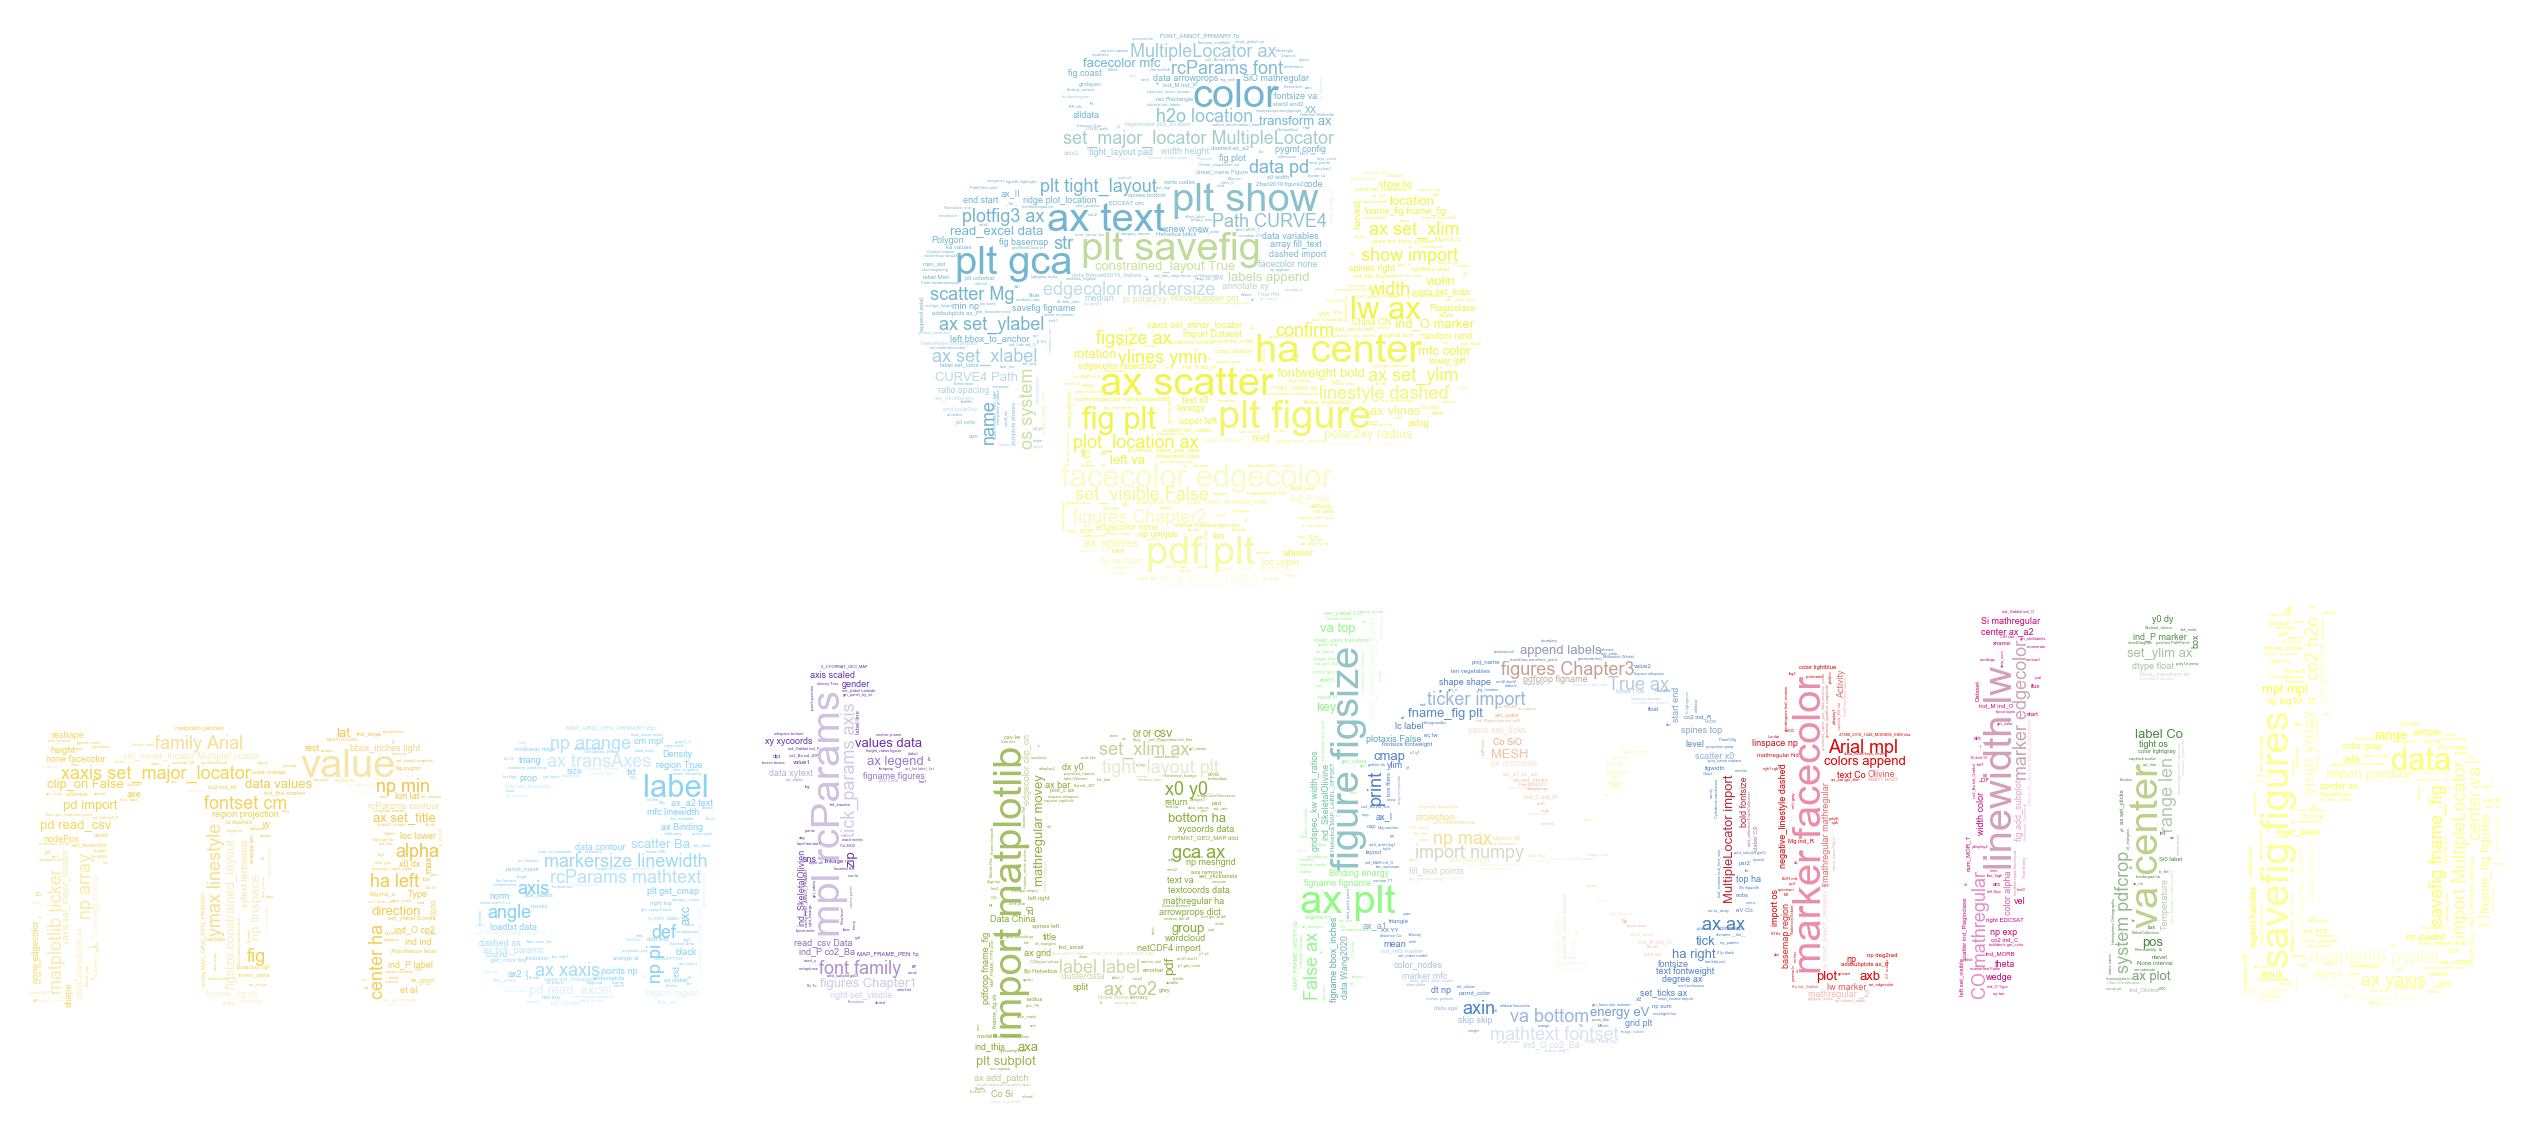

In [73]:
import linecache
# 1. 处理文本：去掉注释，括号()[]和逗号用空格替换
textin='Data/wordcloud/code_chapter1_3.txt'
textout='Data/wordcloud/code_chapter1_3_text.txt'
fpout=open(textout,'w')
alldata=linecache.getlines(textfile)
linecache.clearcache()
replacedtext=['(',')','[',']',',','.','*',"'",'+','/','=','%',':','$','{','}','^','\\','<','>','==','"','-']
for i in range(0,len(alldata)):
    line_str=alldata[i].replace('\n','').split('#')[0]
    for s in replacedtext:
        line_str=line_str.replace(s,' ')
    if(not line_str==''):
        for word in line_str.split(' '):
            fpout.write('%s\n'%word)
fpout.close()

# 绘制词云图
# 读取文本
text = open(textout, encoding="utf-8").read()
# 打开mask图像
parrot_color = np.array(Image.open(os.path.join(d, "Data/wordcloud/Matplotlib.jpg")))
# 重采样
parrot_color = parrot_color[::3, ::3]
# 白色部分是要mask的部分
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255
# 提取图片边界
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255
# 创建词云图对象
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0,font_path=fontpath)
# 生成词云图数据
wc.generate(text)
# 读取图片，提取颜色并给词云图文本重新着色
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)

# 3. 绘制词云图矢量图
ax=plotWordCloud(wc,bkcolor='w')
ax.axis('off')
fname_fig='../../figures/Chapter3/Lecture3_8_practice1.pdf'
plt.savefig(fname_fig,facecolor='k')
# os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()

wc.to_file(fname_fig.replace('.pdf','.png'))